In [1]:
import numpy as np
import pandas as pd 
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tr = pd.read_csv('C:/Users/**.csv') #upload a csv file with the coordinates found by using TrackPy library

In [3]:
tr.head()

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,0,15.252994,361.330409,3118.449759,6.873200,0.123450,23.446991,144910.0,NaN,222,0
1,35,402.867026,686.844693,6357.608100,4.810243,0.074916,65.564733,133489.0,NaN,222,1
2,36,410.818920,372.888517,2726.363971,9.881855,0.239807,16.065531,123870.0,NaN,222,2
3,37,433.876789,425.038156,5462.280419,4.743785,0.251895,68.169954,126957.0,NaN,222,3
4,38,458.569128,536.908744,3639.928200,5.421184,0.031679,36.907300,123700.0,NaN,222,4


In [4]:
coord=tr[["particle", "frame", "x", "y"]]

In [5]:
coord.head()

,particle,frame,x,y
0,0,222,361.330409,15.252994
1,1,222,686.844693,402.867026
2,2,222,372.888517,410.818920
3,3,222,425.038156,433.876789
4,4,222,536.908744,458.569128


In [6]:
a=[coord[coord["particle"]==i].frame.max() for i in range(coord["particle"].max())]

In [7]:
max_frame_particle=pd.DataFrame(a)

In [8]:
a=[coord[coord["particle"]==i].frame.min() for i in range(coord["particle"].max())]

In [9]:
min_frame_particle=pd.DataFrame(a)

In [10]:
no_frame_particle=max_frame_particle-min_frame_particle

In [11]:
no_frame_particle.columns=["Frame Count"]

In [12]:
particle_no=no_frame_particle[no_frame_particle["Frame Count"]>20].index

In [13]:
filtered_part=pd.DataFrame(particle_no)

In [14]:
filtered_part.columns=["particle_num"]

In [15]:
#filtering the particles which contains in more than 20 frames
filtered_coord=[coord[coord["particle"]==i] for i in no_frame_particle[no_frame_particle["Frame Count"]>20].index]

In [16]:
df_filtered_coord=pd.concat(filtered_coord)

In [17]:
df_filtered_coord.head()

,particle,frame,x,y
1,1,222,686.844693,402.867026
101,1,223,686.276088,403.114448
151,1,224,685.796414,403.295218
221,1,225,685.511675,403.565843
296,1,226,685.721514,403.228414


In [18]:
um_per_px=1/3.16 #converting pixel to micrometer

In [19]:
xum1=df_filtered_coord.x*um_per_px

In [20]:
df_filtered_coord["x"]=df_filtered_coord.x*um_per_px

In [21]:
df_filtered_coord["y"]=df_filtered_coord.y*um_per_px

In [22]:
fps=25.2

In [23]:
cx=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.min())].x for i in filtered_part.particle_num]

In [24]:
dx=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.max())].x for i in filtered_part.particle_num]

In [25]:
X1=[((float(dx[i])-float(cx[i]))**2) for i in range(len(filtered_coord))]
X11=[((float(dx[i])-float(cx[i]))) for i in range(len(filtered_coord))]
iX=[((float(cx[i]))) for i in range(len(filtered_coord))]

In [26]:
cy=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.min())].y for i in filtered_part.particle_num]

In [27]:
dy=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.max())].y for i in filtered_part.particle_num]

In [28]:
Y1=[((float(dy[i])-float(cy[i]))**2) for i in range(len(filtered_coord))]
Y11=[((float(dy[i])-float(cy[i]))) for i in range(len(filtered_coord))]
iY=[((float(cy[i]))) for i in range(len(filtered_coord))]

In [29]:
x1=np.array(X1)
x11=np.array(X11)

In [30]:
y1=np.array(Y1)
y11=np.array(Y11)

In [31]:
ds=[math.sqrt(x1[i]+y1[i]) for i in range(len(filtered_coord))]

In [32]:
T1=[(int(df_filtered_coord[df_filtered_coord["particle"]==i].frame.max())+1)/fps-(int(df_filtered_coord[df_filtered_coord["particle"]==i].frame.min())+1)/fps for i in filtered_part.particle_num] 

In [33]:
t1=np.array(T1)

In [34]:
vs=ds/t1
vx=x11/t1
vy=y11/t1

In [35]:
min(vs), max(vs)

(0.0007439178953363205, 4.488615910359377)

Text(0.5, 1.0, 'Velocity Distribution')

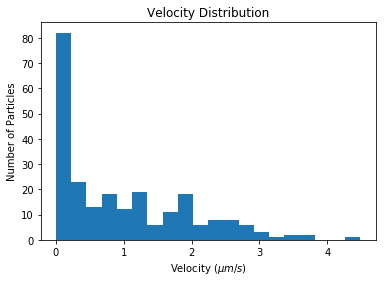

In [36]:
plt.hist(vs, bins=20)
plt.xlabel('Velocity ($\mu m/s$)')
plt.ylabel('Number of Particles')
plt.title('Velocity Distribution')

In [37]:
np.mean(vs), np.median(vs)

(0.9625139348902388, 0.6770880464245422)

In [39]:
norm=1

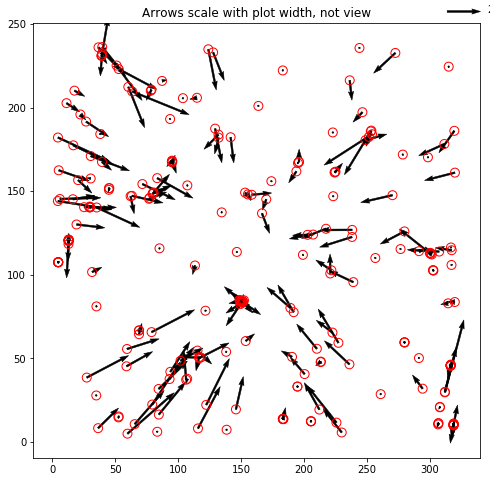

In [40]:
plt.figure(figsize=(8,8))
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(iX, iY, vx*norm, vy*norm, units='width', edgecolor='k', facecolor='k', linewidth=.5)
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.scatter(iX, iY, facecolors='none', edgecolors='r', s=80)
#plt.savefig('Blackarrow.png')

In [41]:
norm = 6 /np.sqrt(vx**2+vy**2)


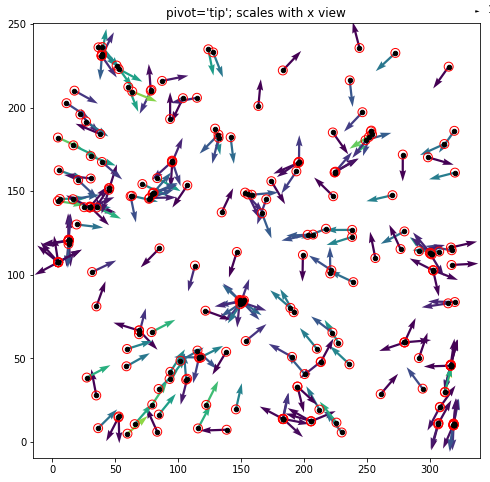

In [42]:
plt.figure(figsize=(8,8))
plt.title("pivot='tip'; scales with x view")
M = np.hypot(vx, vy)
Q = plt.quiver(iX, iY, vx*norm, vy*norm, M, units='width', pivot='tail', width=0.005,
               scale=100)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(iX, iY, facecolors='none', edgecolors='r', s=80)
plt.scatter(iX, iY, color='k', s=20)
#plt.savefig('Colorarrow.png')

In [43]:
Vs=pd.DataFrame(vs)
Vs.columns=['Velocity']
Vs['Power']=17.2
Vs['Position']='On'

In [44]:
Vs.head()

,Velocity,Power,Position
0,1.579446,17.2,On
1,0.002404,17.2,On
2,0.680133,17.2,On
3,0.006499,17.2,On
4,1.953858,17.2,On


In [45]:
Vs.to_csv('C:/Users**.csv') #saving the output file